In [24]:
# iPython widgets, alle possibilities:
from IPython.html import widgets
from ipywidgets import *
from IPython.display import display
import pandas as pd
import unirest

def doTheSearch(button):
    url = "https://spoonacular-recipe-food-nutrition-v1.p.mashape.com/recipes/search?number=15&offset=0&query=" 
    url += searchterms.value +"&type=main+course&cuisine=" + cuisine.value
    recipes = unirest.get(url,
      headers={
        "X-Mashape-Key": "uI9T1GTt8nmshcUUWJOjq8TQNGBgp1P9Zffjsn7dAbkmTSDt1k",
        "Accept": "application/json"
      }
    )

    testData = recipes.body
    testFrame = pd.DataFrame(testData['results'], columns=['id', 'title', 'readyInMinutes'])
    print(testFrame.to_string())
    print(int(time.value)/testFrame.get('readyInMinutes'))


searchterms = widgets.Text(description='Keywords: ', margin = '10px')
cuisine = widgets.Text(description='Cuisine: ', margin = '10px')
time = widgets.Text(description='Minutes: ', margin = '10px')

tab1_children = [searchterms, cuisine, time]

tab1 = VBox(children=tab1_children)

i = widgets.Accordion(children=[tab1], border_color='black', margin = '10px')

i.set_title(0,"Search for a recipe!")
button = widgets.Button(description="Search", icon='check', button_style='success', width='100px', margin = '10px')
display(i)
display(button)
button.on_click(doTheSearch)

C:\Users\Tobias\Anaconda3\envs\python2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


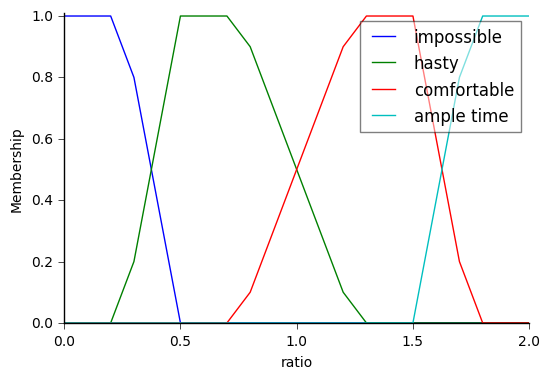

In [25]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# antecedent 
ratio = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'ratio')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
#ratio['ample time'] = fuzz.gaussmf(ratio.universe, 0, 0.35)
#ratio['comfortable'] = fuzz.gaussmf(ratio.universe, 0.75, 0.25)
#ratio['hasty'] = fuzz.gaussmf(ratio.universe, 1.25, 0.25)
#ratio['impossible'] = fuzz.gaussmf(ratio.universe, 2, 0.35)
ratio['impossible'] = fuzz.trapmf(ratio.universe, [0, 0, 0.25, 0.5])
ratio['hasty'] = fuzz.trapmf(ratio.universe, [0.25, 0.5, 0.75, 1.25])
ratio['comfortable'] = fuzz.trapmf(ratio.universe, [0.75, 1.25, 1.5, 1.75])
ratio['ample time'] = fuzz.trapmf(ratio.universe, [1.5, 1.75, 2, 2])
ratio.view()

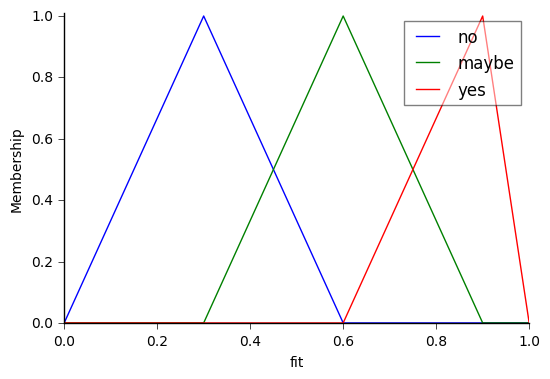

In [26]:
# antecedent 
fit = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'fit')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
fit['no'] = fuzz.trimf(fit.universe, [0, 0.3, 0.6])
fit['maybe'] = fuzz.trimf(fit.universe, [0.3, 0.6, 0.9])
fit['yes'] = fuzz.trimf(fit.universe, [0.6, 0.9, 1])
fit.view()

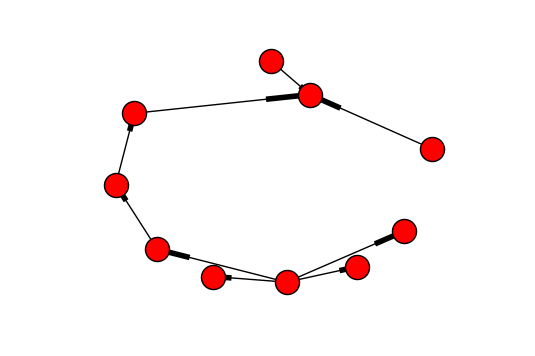

In [27]:
rule1 = ctrl.Rule(ratio['impossible'], fit['no'])
rule2 = ctrl.Rule(ratio['hasty'], fit['maybe'])
rule3 = ctrl.Rule(ratio['comfortable'], fit['yes'])
rule4 = ctrl.Rule(ratio['ample time'], fit['yes'])

rule1.view()

0.833333333333


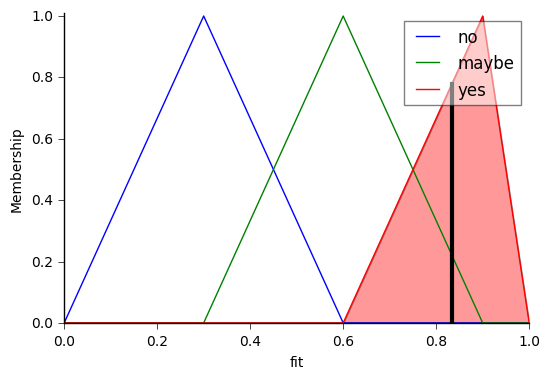

In [28]:
fit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fitting = ctrl.ControlSystemSimulation(fit_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
fitting.input['ratio'] = 1.5

# Crunch the numbers
fitting.compute()
print fitting.output['fit']
fit.view(sim=fitting)